In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv("HDFCBANK.csv")
print(dataset)
dataset.shape

            Date    Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03  HDFCBANK     EQ      157.40   166.00   170.00   166.00   
1     2000-01-04  HDFCBANK     EQ      170.00   182.00   183.45   171.00   
2     2000-01-05  HDFCBANK     EQ      173.80   170.00   173.90   165.00   
3     2000-01-06  HDFCBANK     EQ      166.95   168.00   170.00   165.30   
4     2000-01-07  HDFCBANK     EQ      168.30   162.15   171.00   162.15   
...          ...       ...    ...         ...      ...      ...      ...   
5301  2021-04-26  HDFCBANK     EQ     1414.15  1413.00  1429.00  1402.75   
5302  2021-04-27  HDFCBANK     EQ     1404.80  1407.25  1442.00  1404.80   
5303  2021-04-28  HDFCBANK     EQ     1438.70  1436.25  1479.00  1431.00   
5304  2021-04-29  HDFCBANK     EQ     1476.80  1486.20  1503.65  1461.00   
5305  2021-04-30  HDFCBANK     EQ     1472.50  1445.00  1453.80  1407.50   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0      170.00   17

(5306, 15)

In [ ]:
#function to calculate compound annual growth rate
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1007.093884,1007.472767,1019.986939,993.822211,1007.364003,1007.330390,1006.929263,2.102580e+06,2.448837e+14,82923.625407,1.261883e+06,0.595003
std,635.757762,635.461516,641.444674,629.502818,635.722752,635.675021,635.481917,3.970048e+06,4.778103e+14,93575.061741,2.070127e+06,0.121337
min,157.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10,807.000000,4.631000e+03,0.177900
25%,479.912500,482.112500,486.912500,473.100000,480.700000,480.200000,479.512500,3.058325e+05,1.640025e+13,26850.500000,2.624830e+05,0.517800
50%,934.750000,939.350000,953.950000,922.175000,935.600000,935.725000,937.455000,9.444650e+05,1.150443e+14,44227.000000,6.271970e+05,0.600200
75%,1421.000000,1423.525000,1440.000000,1399.000000,1422.812500,1421.000000,1420.567500,2.123647e+06,2.154477e+14,104139.250000,1.433151e+06,0.674000
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16,790631.000000,6.669683e+07,1.000000


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)
dataset.index = dataset['Date']

In [ ]:
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.0,9791881.0,0.6491
2021-04-27,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.0,5650216.0,0.5488
2021-04-28,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.0,7196647.0,0.5971


In [ ]:
dataset.index = (dataset.index - pd.to_datetime('2000-01-03')).days
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.0,9791881.0,0.6491
7785,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.0,5650216.0,0.5488
7786,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.0,7196647.0,0.5971


In [ ]:
#Convert the pandas series into numpy array, we need to further 
#massage it before sending it to regression model
y = np.asarray(dataset['Close'])
x = np.asarray(dataset.index.values)

In [ ]:
from sklearn.linear_model import LinearRegression
#for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

#degree of the equation is 1.
#mathematical model equation is y = mx + c, 
regression_model = LinearRegression()
#Here the degree is set to 3.
# mathematical model equation is 
#y = c0 + c1.x**1 + c2.x**2+c3.x**3
poly = PolynomialFeatures(4)

In [ ]:
#Convert dimension x in the higher degree polynomial expression
X_transform = poly.fit_transform(x.reshape(-1, 1))
#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))

LinearRegression()

In [ ]:
# Prediction for historical dates. Let's call it learned values.
y_pred = regression_model.predict(X_transform)

In [ ]:
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 3650))
newindex

array([ 7788,  7789,  7790, ..., 11435, 11436, 11437])

In [ ]:
#Convert the extended dimension x in the higher degree polynomial expression
X_future = poly.fit_transform(newindex.reshape(-1, 1))
X_future

array([[1.00000000e+00, 7.78800000e+03, 6.06529440e+07, 4.72365128e+11,
        3.67877962e+15],
       [1.00000000e+00, 7.78900000e+03, 6.06685210e+07, 4.72547110e+11,
        3.68066944e+15],
       [1.00000000e+00, 7.79000000e+03, 6.06841000e+07, 4.72729139e+11,
        3.68255999e+15],
       ...,
       [1.00000000e+00, 1.14350000e+04, 1.30759225e+08, 1.49523174e+12,
        1.70979749e+16],
       [1.00000000e+00, 1.14360000e+04, 1.30782096e+08, 1.49562405e+12,
        1.71039566e+16],
       [1.00000000e+00, 1.14370000e+04, 1.30804969e+08, 1.49601643e+12,
        1.71099399e+16]])

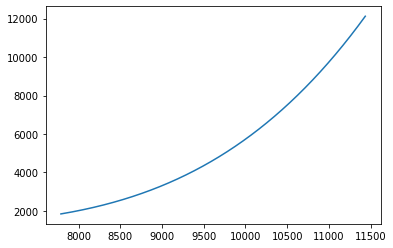

In [ ]:
#Prediction for future dates. Let's call it predicted values.
y_future = regression_model.predict(X_future)
y_future
plt.plot(newindex,y_future)

In [ ]:



#Print the last predicted value
print ("Closing price at 2032 would be around ", y_future[-1])

Closing price at 2032 would be around  [12122.14379312]


In [ ]:
x = pd.to_datetime(dataset.index, origin='2001-01-03', unit='D')
future_x = pd.to_datetime(newindex, origin='2001-01-03', unit='D')

In [ ]:

#Print CAGR for next ten years.
print ('Your investments will have a CAGR of ',(CAGR(y[-1], y_future[-1], 10)), '%')

Your investments will have a CAGR of  [23.98388685] %


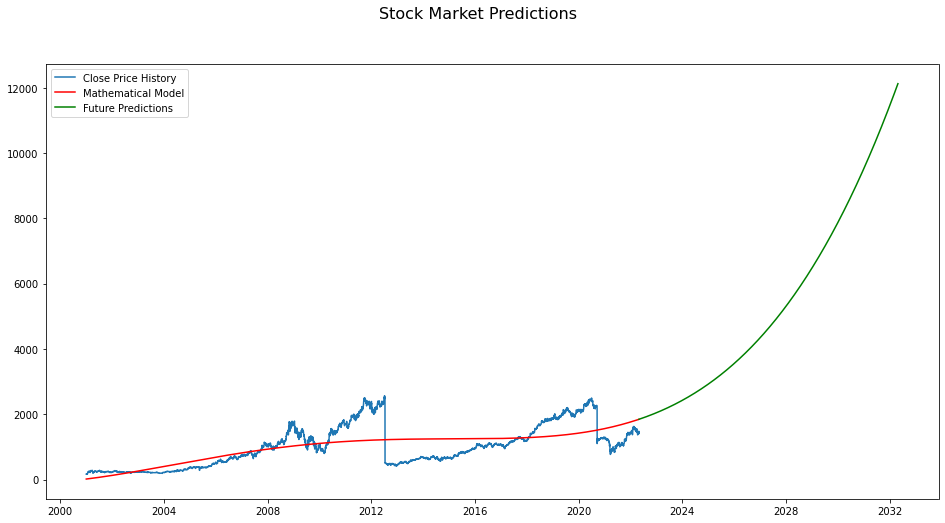

In [ ]:



#Setting figure size
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 20,10

#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,dataset['Close'], label='Close Price History')

#Plot the regression model
plt.plot(x,y_pred, color='r', label='Mathematical Model')
#Plot the future predictions
plt.plot(future_x,y_future, color='g', label='Future Predictions')
#Set the title of the graph
plt.suptitle('Stock Market Predictions', fontsize=16)

#Set the title of the graph window
fig = plt.gcf()
fig.canvas.set_window_title('Stock Market Predictions')

#display the legends
plt.legend()
#display the graph
plt.show()